In [6]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('./emnist/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./emnist/emnist-balanced-test.csv
./emnist/emnist-balanced-train.csv
./emnist/emnist-byclass-mapping.txt
./emnist/emnist-byclass-test.csv
./emnist/emnist-byclass-train.csv
./emnist/emnist-bymerge-mapping.txt
./emnist/emnist-bymerge-test.csv
./emnist/emnist-bymerge-train.csv
./emnist/emnist-digits-mapping.txt
./emnist/emnist-digits-test.csv
./emnist/emnist-digits-train.csv
./emnist/emnist-letters-mapping.txt
./emnist/emnist-letters-test.csv
./emnist/emnist-letters-train.csv
./emnist/emnist-mnist-mapping.txt
./emnist/emnist-mnist-test.csv
./emnist/emnist-mnist-train.csv
./emnist/emnist_source_files\emnist-balanced-test-images-idx3-ubyte
./emnist/emnist_source_files\emnist-balanced-test-labels-idx1-ubyte
./emnist/emnist_source_files\emnist-balanced-train-images-idx3-ubyte
./emnist/emnist_source_files\emnist-balanced-train-labels-idx1-ubyte
./emnist/emnist_source_files\emnist-byclass-test-images-idx3-ubyte
./emnist/emnist_source_files\emnist-byclass-test-labels-idx1-ubyte
./emnist/emnist_s

In [7]:
#load data
testing_letter = pd.read_csv('./emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('./emnist/emnist-letters-train.csv')

In [8]:
#list number of images in dataset
print(training_letter.shape)

print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [13]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


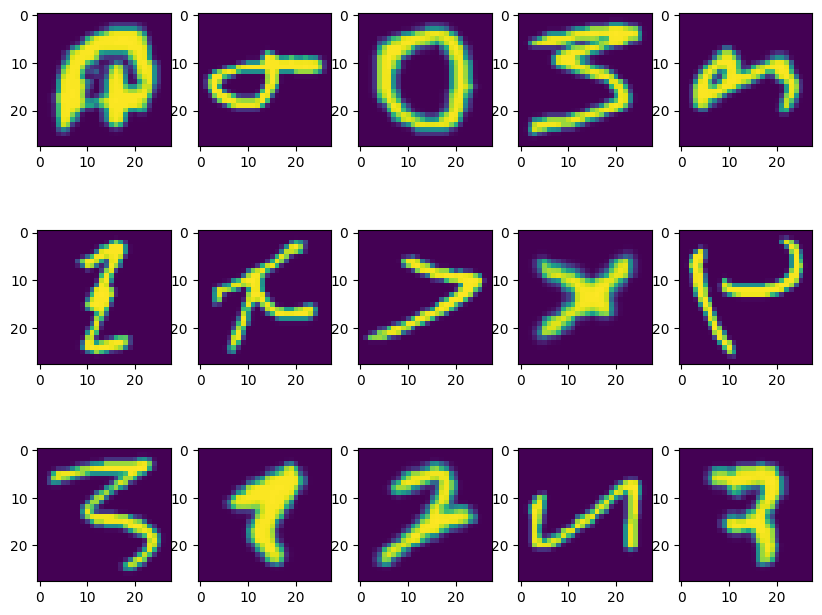

In [15]:
#show loaded images
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))
plt.show()

In [16]:
import tensorflow as tf

In [17]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [18]:
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)


In [34]:
def show_images(data,labels, GRID=[8,8], FIGSIZE=(20,20), model=None):
    
    
    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_images = GRID[0] * GRID[-1]
    
    # Get the data for data visualization
    
    
    # Iterate over data 
    for n_image, (image, label) in enumerate(zip(data, labels)):
        
        # Plot the image into the subplot.
        plt.subplot(GRID[0], GRID[1], n_image+1)
        plt.imshow(tf.squeeze(image))
        plt.axis('off')
        
        # Adding the title
        if model is not None:
            image = tf.expand_dims(image, axis=0)
            pred = model.predict(image)[0]
            max_index = tf.argmax(pred)
            score = pred[max_index]
            title = "Pred : {}\nScore : {:.4}".format(score)
            plt.title(title)
        
        # Break the loop 
        if n_image+1>=n_images:
            break
    
    # Show the final plot
    plt.tight_layout()
    plt.show()


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [22]:
from sklearn.model_selection import train_test_split

In [37]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [42]:
print(np.unique(test_y))

[0. 1.]


In [24]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [27]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.8232
Epoch 1: val_accuracy improved from -inf to 0.88637, saving model to Best_points.h5
2220/2220 [==============================] - 91s 41ms/step - loss: 0.5660 - accuracy: 0.8232 - val_loss: 0.3515 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 2/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.9083
Epoch 2: val_accuracy improved from 0.88637 to 0.89589, saving model to Best_points.h5
2220/2220 [==============================] - 87s 39ms/step - loss: 0.2805 - accuracy: 0.9083 - val_loss: 0.3355 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 3/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9285
Epoch 3: val_accuracy did not improve from 0.89589
2220/2220 [==============================] - 88s 40ms/step - loss: 0.2122 - accuracy: 0.9285 - val_loss: 0.3342 - val_accuracy: 0.8949 - lr: 0.0010
Epoch 4/10
2220/2220 [==================

In [28]:
import seaborn as sns


Text(0, 0.5, 'Accuray')

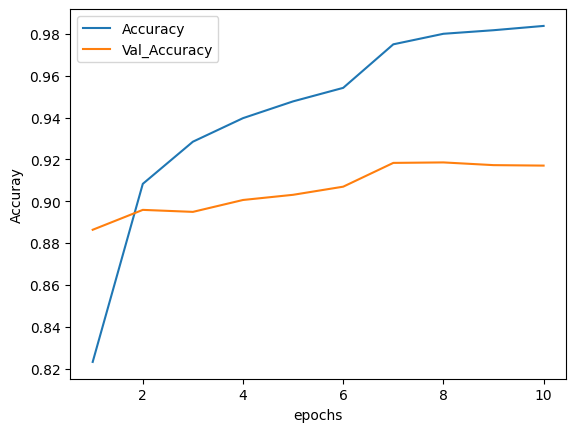

In [29]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [49]:
model.predict(test_x)

555/555 [==============================] - 4s 8ms/step


array([[1.0946793e-11, 9.9681562e-01, 1.7829927e-21, ..., 9.5344544e-13,
        1.9110382e-13, 4.3026498e-13],
       [1.2539842e-12, 5.0705991e-19, 7.2413148e-16, ..., 2.2316150e-14,
        4.1211401e-12, 3.5997366e-12],
       [2.2821912e-14, 1.3002761e-22, 9.4846853e-16, ..., 5.0639197e-14,
        2.2417239e-14, 3.3275683e-14],
       ...,
       [3.5661314e-11, 1.7025100e-14, 1.9299200e-12, ..., 6.9584311e-10,
        8.8745386e-11, 1.7267590e-11],
       [2.0352426e-08, 3.9695318e-09, 1.5020998e-08, ..., 8.9766869e-09,
        2.6119530e-08, 6.4726122e-09],
       [2.9039792e-15, 8.8216303e-25, 1.2417883e-23, ..., 1.1419356e-15,
        6.2718205e-16, 2.4195075e-15]], dtype=float32)